In [1]:
import datetime
import pandas_datareader as pdr
import pandas as pd

api_key='7219b690b53b7b2a66c83339a10e570b926d12a3' # <your OWN API token aka key goes her


tickers = ['BP', 'TSLA', 'TWTR', 'MSFT']  # BP, TESLA, Twitter,  microsoft


start="2020-1-1"
end="2021-7-1"

df = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)


all_data = df.read()
all_data

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close      high       low     open  \
symbol date                                                             
BP     2020-01-02 00:00:00+00:00   38.14   38.1500   37.8700   38.040   
       2020-01-03 00:00:00+00:00   38.83   39.0900   38.4600   38.480   
       2020-01-06 00:00:00+00:00   39.85   40.0800   39.6600   39.680   
       2020-01-07 00:00:00+00:00   39.43   39.4800   39.0000   39.360   
       2020-01-08 00:00:00+00:00   38.83   39.3000   38.5900   39.240   
...                                  ...       ...       ...      ...   
MSFT   2021-06-25 00:00:00+00:00  265.02  267.2500  264.7600  266.230   
       2021-06-28 00:00:00+00:00  268.72  268.9000  265.9100  266.185   
       2021-06-29 00:00:00+00:00  271.40  271.6500  267.9800  268.865   
       2021-06-30 00:00:00+00:00  270.90  271.3598  269.6043  270.690   
       2021-07-01 00:00:00+00:00  271.60  271.8400  269.6000  269.610   

                                    volume    adjClose     adjHigh  \
symbol date                                                          
BP     2020-01-02 00:00:00+00:00   6565065   32.906642   32.915270   
       2020-01-03 00:00:00+00:00  14000652   33.501964   33.726289   
       2020-01-06 00:00:00+00:00  15091670   34.382006   34.580446   
       2020-01-07 00:00:00+00:00  12494777   34.019636   34.062775   
       2020-01-08 00:00:00+00:00   9335579   33.501964   33.907474   
...                                    ...         ...         ...   
MSFT   2021-06-25 00:00:00+00:00  25611113  263.482353  265.699414   
       2021-06-28 00:00:00+00:00  19590024  267.160885  267.339841   
       2021-06-29 00:00:00+00:00  19937811  269.825336  270.073885   
       2021-06-30 00:00:00+00:00  21656457  269.328237  269.785369   
       2021-07-01 00:00:00+00:00  16725323  270.024175  270.262783   

                                      adjLow     adjOpen  adjVolume  divCash  \
symbol date                                                                    
BP     2020-01-02 00:00:00+00:00   32.673690   32.820364    6565065      0.0   
       2020-01-03 00:00:00+00:00   33.182734   33.199989   14000652      0.0   
       2020-01-06 00:00:00+00:00   34.218076   34.235332   15091670      0.0   
       2020-01-07 00:00:00+00:00   33.648638   33.959241   12494777      0.0   
       2020-01-08 00:00:00+00:00   33.294896   33.855706    9335579      0.0   
...                                      ...         ...        ...      ...   
MSFT   2021-06-25 00:00:00+00:00  263.223861  264.685332   25611113      0.0   
       2021-06-28 00:00:00+00:00  264.367189  264.640593   19590024      0.0   
       2021-06-29 00:00:00+00:00  266.425179  267.305044   19937811      0.0   
       2021-06-30 00:00:00+00:00  268.040054  269.119455   21656457      0.0   
       2021-07-01 00:00:00+00:00  268.035779  268.045721   16725323      0.0   

                                  splitFactor  
symbol date                                    
BP     2020-01-02 00:00:00+00:00          1.0  
       2020-01-03 00:00:00+00:00          1.0  
       2020-01-06 00:00:00+00:00          1.0  
       2020-01-07 00:00:00+00:00          1.0  
       2020-01-08 00:00:00+00:00          1.0  
...                                       ...  
MSFT   2021-06-25 00:00:00+00:00          1.0  
       2021-06-28 00:00:00+00:00          1.0  
       2021-06-29 00:00:00+00:00          1.0  
       2021-06-30 00:00:00+00:00          1.0  
       2021-07-01 00:00:00+00:00          1.0  

[1512 rows x 12 columns]

In [14]:
all_data.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

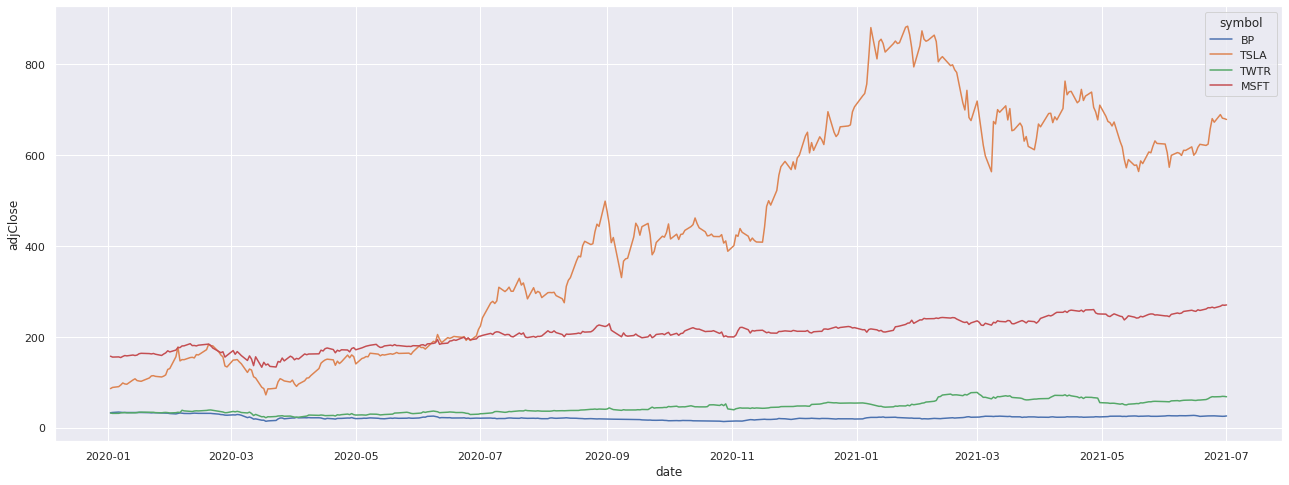

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(22, 8)})
sns.lineplot(data=all_data, x='date', y='adjClose', hue='symbol');

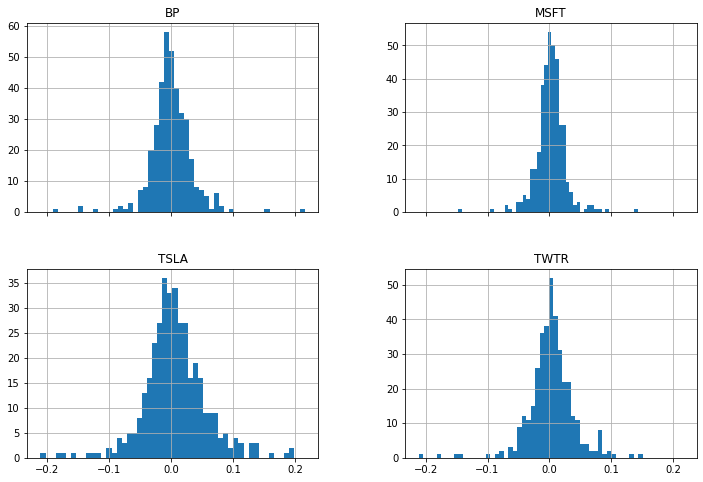

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['adjClose']].reset_index().pivot('date', 'symbol', 'adjClose')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

# My observation:


1.   Overall:
*   The percentage change graph for each company is normally distributed
 
*  The majority of the time, these four leading big companies have steadily increasing or decreasing stock prices (likely following general market sentiment). 

*  All four companies are big-brand and well-known entities, and besides Telsa, much of their potential future earnings are 'priced in'. Although from the adjusted close price graph Telsa, Microsoft, and Twitter show generally increasing valuations.

---



2.   Individual Plots:


*   Tesla's graph is less centered around zero which shows how its stock price has greater variance up and down. This is to say, there are more dramatic than the other three, and there were more than 35 days where there was a negative percentage change, which indicates the stock price decreased during this period, but on the positive side having such price changes can help those with strategies relying on variable price.

*   Microsoft's graph is much more tightly centered around zero than the other three, meaning its stock price is relatively steadier than others, most of the time the changes close around 0%, and at zero for more than 50 days


*  For more than 60 days,  BP'stock price had negative growth, good days and bad days are roughly even, with swings of -0.2% to 0.2%. This likely correlates with oil price changes, general economic outlook, and political developments around oil-producing countries / OPEC price announcements.

*   For more than 50 days, Twitter'stock price had positive growth, there were a few days, and it had more than a 0.2% drop. It appears to stand between Microsoft and Telsa in terms of variability. 











